(100, 2)
[0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1]
2


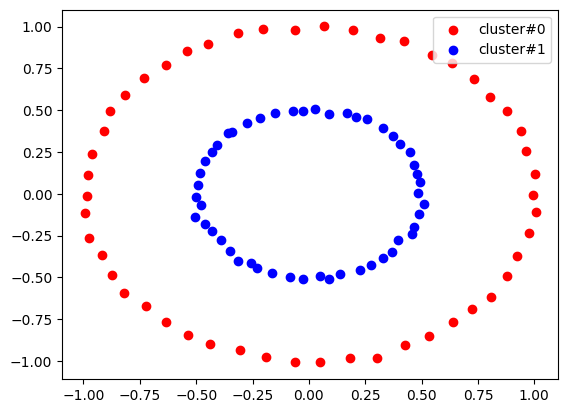

In [1]:
# 비지도학습(데이터에 label,target, 종속변수가 없는 경우)에 대해서 알아보아요!

# DBSCAN을 이용해서 KMeans로 clustering하지 못한 경우를 해결해 보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

# 이 함수는 두개의 원으로 이루어진 데이터를 생성해요!
# n_samples : 데이터의 총 개수
# factor : 값이 0에 가까울 수록 두 원의 거리가 멀어져요
#          1에 가까울수록 두 원의 거리가 가까워요!
# noise :  데이터에 추가되는 무작위 노이즈의 양
circle_points, circle_labels = make_circles(n_samples=100,
                                            factor=0.5,
                                            noise=0.01)

print(circle_points.shape)  # (100, 2)
print(circle_labels)

# plt.scatter(circle_points[:,0], circle_points[:,1])
# plt.show()

epsilon = 0.2
minPts = 3

from sklearn.cluster import DBSCAN

circle_model = DBSCAN(eps=epsilon,
                      min_samples=minPts)

circle_model.fit(circle_points)

# cluster의 수는 몇개가 나오나요?
print(max(circle_model.labels_) + 1)

my_color = {0: 'red', 1: 'blue'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(2):
    cluster_sub_points = circle_points[circle_model.labels_ == n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

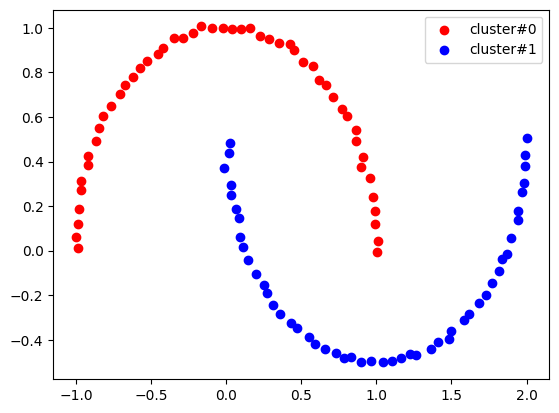

In [2]:
# 달 모양과 대각선으로 길게 이어진 데이터에 대해
# 우리가 원하는 대로 clustering을 DBSCAN으로 할 수 있는지 확인

from sklearn.datasets import make_moons

moon_points, moon_labels = make_moons(n_samples=100,
                                      noise=0.01)

moon_model =  DBSCAN(eps=epsilon,
                      min_samples=minPts)

moon_model.fit(moon_points)

my_color = {0: 'red', 1: 'blue'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(2):
    cluster_sub_points = moon_points[moon_model.labels_ == n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

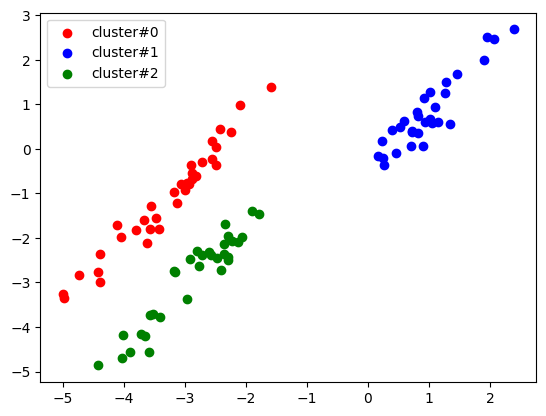

In [22]:
from sklearn.datasets import make_blobs

diag_points, _ = make_blobs(n_samples=100,
                            random_state=170)

# 대각행렬을 이용해서 데이터를 대각선 분포로 변형
transfomation = [[0.6, 0.6],
                 [-0.4, -0.8]]

diag = np.dot(diag_points, transfomation)

diag_model = DBSCAN(eps=0.7,
                      min_samples=3)

diag_model.fit(diag)

my_color = {0: 'red', 1: 'blue', 2: 'green'}
# 각 cluster마다 scatter를 반복적으로 그리면 되요!
for n in range(3):
    cluster_sub_points = diag[diag_model.labels_ == n]
    plt.scatter(cluster_sub_points[:,0],
                cluster_sub_points[:,1],
                color=my_color[n],
                label=f'cluster#{n}')

plt.legend()
plt.show()

In [23]:
# 차원축소 기법 중 주성분분석(PCA)에 대해서 알아보아요

# 사용할 예제는 Iris예요!
# 아시다시피.. Iris는 3가지 품종이 있어요!
# 각 품종을 결정짓는 요소는 4가지가 있어요.
# 꽃받침(sepal)의 길이와 너비, 꽃잎(petal)의 길이와 너비

# 이 데이터를 차원축소예제로 드는 이유는..
# 독립변수에 대해 상관관계분석을 해 보면 상관계수가 높은 feature가 존재!
# 이런 경우 차원축소를 이용하면 훨씬 더 좋은 효과를 얻을 수 있어요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Raw Data Loading
iris = load_iris()

iris_df = pd.DataFrame(iris.data,
                       columns=['sepal_length', 'sepal_width',
                                'petal_length', 'petal_width'])
display(iris_df.head())

# 상관관계분석
iris_df.corr()
# feature간에 연관성이 깊어요!

# 따라서 주성분분석(PCA)을 통해 차원을 축소해서 사용하면
# 약간의 데이터 로스가 발생하겠지만 모델의 복잡도가 줄고
# overfitting도 줄어들어서 더 좋은 모델이 만들어 질 수 도 있어요!

# 주성분을 몇개로 하면 좋을까요???
# 이 개수를 구하기 위해 주성분의 분산을 계산해서 사용해요!
from sklearn.decomposition import PCA

pca = PCA(random_state=1004)  # 주성분의 개수를 안줬어요!
                              # 차원을 축소하지는 않아요!

pca.fit_transform(iris_df)

pca.explained_variance_ratio_
#독립변수의 비중?
#([0.92461872, 0.05306648, 0.01710261, 0.00521218])

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([0.92461872, 0.05306648, 0.01710261, 0.00521218])